# Implementation of Decision Tree Classifier on Iris Dataset
***
## Steps
- Importing Modules & Dataset
- About Iris Dataset
- Training Decision tree
- Tree visualization
- Model evaluation
***

## Dataset to be used: Iris Dataset

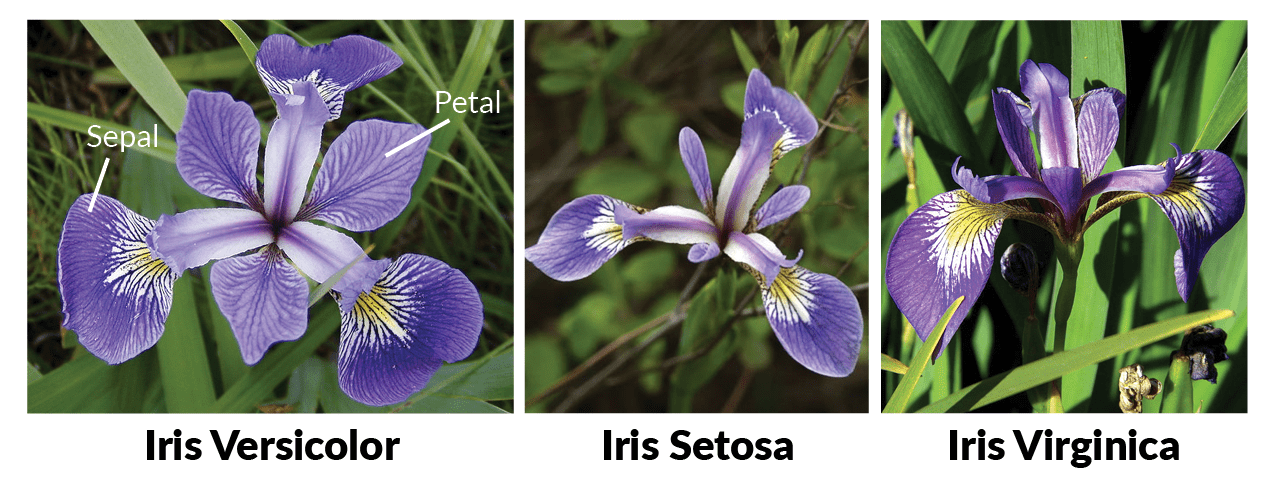

Dataset of 150 flowers of three classes : **Iris Setosa, Iris Versicolour and Iris Virginica.** Each class has 50 flowers.
### Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica

### Importing modules

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import display, Image 


In [6]:
from sklearn import tree

In [5]:
import sklearn.tree as tr

In [7]:
pydotplus.find_graphviz()

{'dot': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\dot.bat',
 'twopi': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\twopi.bat',
 'neato': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\neato.bat',
 'circo': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\circo.bat',
 'fdp': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\fdp.bat',
 'sfdp': 'C:\\Users\\LENOVO\\anaconda3\\Library\\bin\\sfdp.bat'}

### Loading dataset and spliting

In [8]:
iris= datasets.load_iris()
# dir(iris)
# iris.target_names

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names[2]

'virginica'

In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(iris.data, iris.target,test_size=0.10, random_state=44,shuffle=True)
print(Y_train)

[0 2 1 0 2 1 2 2 1 2 2 0 1 0 1 0 1 1 2 0 1 0 0 2 1 0 0 2 0 0 2 0 2 1 1 0 0
 2 0 2 2 2 1 1 0 2 0 1 2 2 2 1 1 0 1 2 1 2 0 0 0 2 0 0 2 0 1 0 1 2 0 1 2 0
 1 2 1 2 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 2 0 1 0 1 1 2 2 2 0 2 2 1 2 2
 1 2 1 0 1 2 1 1 2 2 0 0 1 2 2 1 1 2 2 1 1 2 1 0]


### Model creation and training

In [22]:
clf=dtc()

In [23]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

### Model visualization

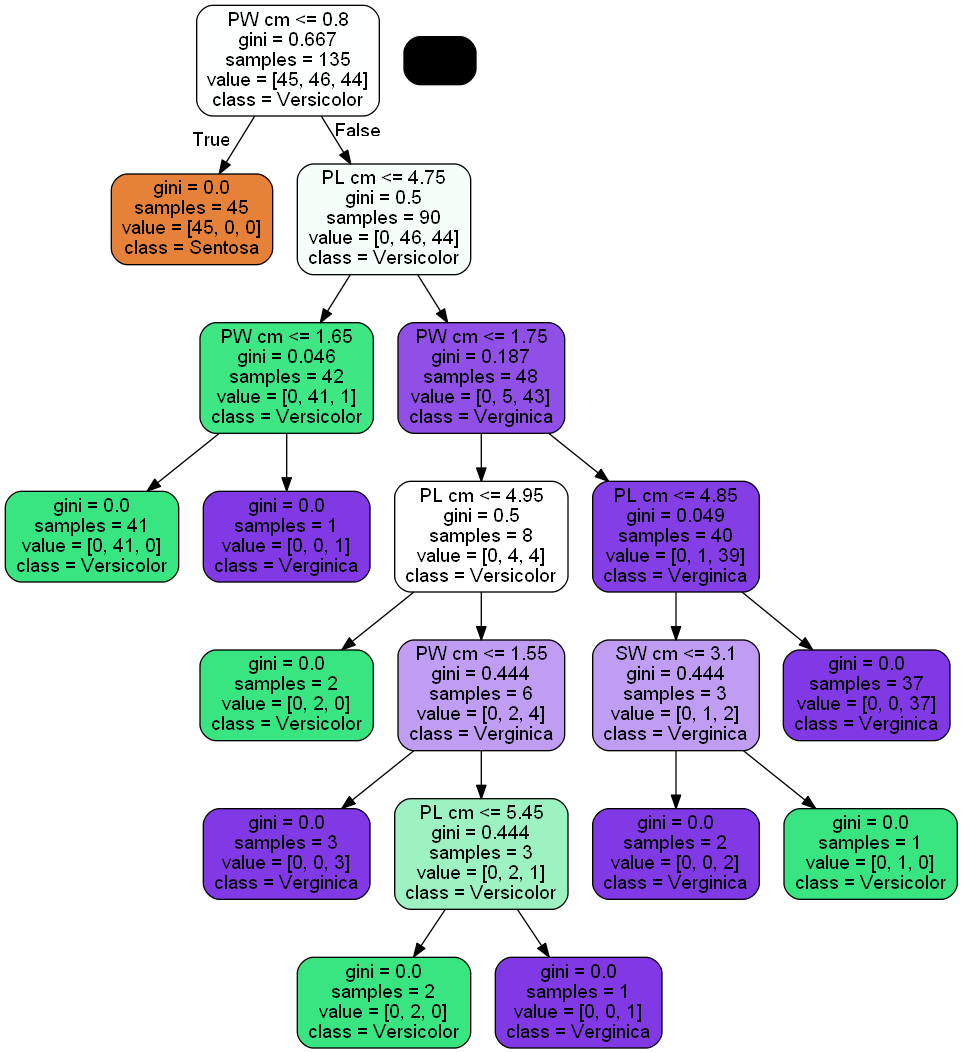

In [24]:
f_name=['SL cm','SW cm','PL cm','PW cm']
c_name=[ 'Sentosa', 'Versicolor', 'Verginica']
dot_data=export_graphviz(clf, feature_names = f_name, class_names=c_name, out_file=None, filled=True,rounded=True)
graph= pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')
display(Image(filename='iris.png'))

### Model evaluation

In [25]:
pred=clf.predict(X_test)

In [26]:
pred

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0])

In [27]:
Y_test

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0])

In [28]:
((pred==Y_test).sum()/len(pred))*100

100.0

In [29]:
print(confusion_matrix(Y_test,pred))

[[5 0 0]
 [0 4 0]
 [0 0 6]]


In [30]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [31]:
X_test[2]

array([5.7, 2.6, 3.5, 1. ])

In [28]:
print(clf.predict(X_test[4].reshape(1,4)))

[2]


In [29]:
Y_test[4]

2